# Goal here is to call all the work I've done in one place
1. Choose a model
2. Train the model K times, save K models
3. For each of K models, get an FID, FJD
4. :)

In [1]:
import matplotlib.pyplot as plt
import itertools
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
import tensorflow_datasets as tfds
import torchvision
from tensorflow.keras.datasets import cifar10
import numpy as np
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
# Don't load a model - we need to train new ones!
#G = g_arches.rgb_32_C_G(100, 10)
#G.load_state_dict(torch.load('models/cgan_cifar_G.pt'))

In [3]:
num_experiments = 5
n_epochs = 60
n_samples = 50000 # one-quarter of training data

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True)

print(trainset.data.shape)
print(len(trainset.targets))
classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
xtrain = trainset.data[0:n_samples, :, :, :]
ytrain = trainset.targets[0:n_samples]
print(xtrain.shape)
xtrain = (torch.from_numpy(xtrain).float() / 255)*2 - 1
xtrain = xtrain.permute(0,3,1,2)

print(torch.min(xtrain), torch.max(xtrain))
print(xtrain.shape)

Files already downloaded and verified
(50000, 32, 32, 3)
50000
(50000, 32, 32, 3)
tensor(-1.) tensor(1.)
torch.Size([50000, 3, 32, 32])


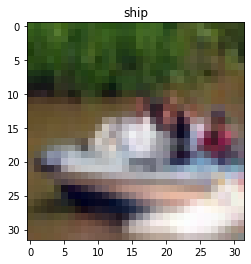

In [4]:
rand_ind = np.random.randint(n_samples)
plt.imshow(0.5*xtrain[rand_ind].permute(1,2,0) + .5)
plt.title(classes[ytrain[rand_ind]])
plt.show()

In [5]:
training_data = []
for i in range(n_samples):
    training_data.append((xtrain[i], ytrain[i]))

cuda
Files already downloaded and verified


C:\Users\Alex\Documents\IAEGAN\cyc_caegan_cifar.py:164: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


Epoch 10 - loss_ae (mse): 0.105, loss_cond: 0.048, loss_D: 0.785, loss_G: 2.028


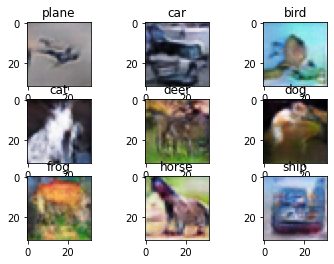

Accuracy of the network on the test images: 69 %
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/78 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 78/78 [02:25<00:00,  1.87s/it]


FID:  36.99346551693378
FJD:  43.736581131798175
36.99346551693378 43.736581131798175
cuda
Files already downloaded and verified
Epoch 10 - loss_ae (mse): 0.110, loss_cond: 0.049, loss_D: 0.763, loss_G: 2.169


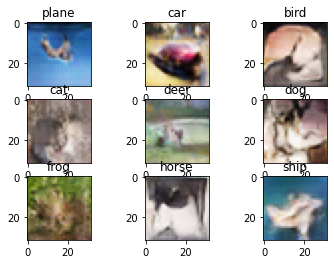

Accuracy of the network on the test images: 70 %
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/78 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 78/78 [03:04<00:00,  2.37s/it]


FID:  37.4120667379168
FJD:  46.160811395662904
37.4120667379168 46.160811395662904
cuda
Files already downloaded and verified
Epoch 10 - loss_ae (mse): 0.107, loss_cond: 0.042, loss_D: 0.770, loss_G: 2.142


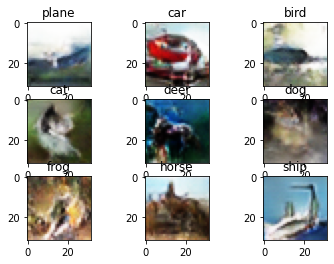

Accuracy of the network on the test images: 67 %
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/78 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 78/78 [03:04<00:00,  2.36s/it]


FID:  39.48779814267493
FJD:  47.16691703938227
39.48779814267493 47.16691703938227
cuda
Files already downloaded and verified
Epoch 10 - loss_ae (mse): 0.106, loss_cond: 0.046, loss_D: 0.779, loss_G: 2.062


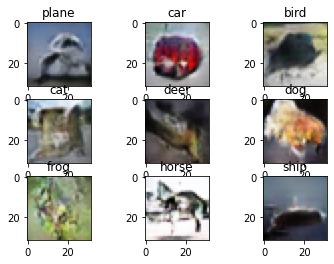

Accuracy of the network on the test images: 66 %
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/78 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 78/78 [03:04<00:00,  2.36s/it]


FID:  36.80486329084192
FJD:  44.01666293172548
36.80486329084192 44.01666293172548
cuda
Files already downloaded and verified
Epoch 10 - loss_ae (mse): 0.104, loss_cond: 0.046, loss_D: 0.764, loss_G: 2.157


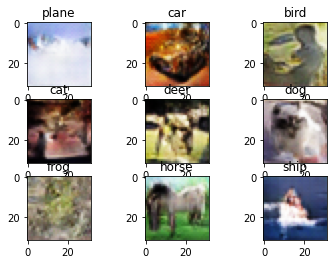

Accuracy of the network on the test images: 69 %
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/78 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 78/78 [03:04<00:00,  2.36s/it]


FID:  37.35806705185473
FJD:  45.36172313790189
37.35806705185473 45.36172313790189


In [6]:
fids, fjds = [], []
accs = []

import cyc_caegan_cifar
import model_to_fid

for experiment in range(num_experiments):
    
    D, G, acc = cyc_caegan_cifar.train_cyc_caegan(experiment, n_epochs = 60, input_trainset = training_data) # Inspect the PY for hyperparam verification, etc
    fid, fjd = model_to_fid.get_fid_fjd(G, conditioning = True, samples_per_condition = 6)
    accs.append(acc)
    fids.append(fid)
    fjds.append(fjd)
    print(fid, fjd)
    #fid, fjd = get_fid_fjd(G, conditioning = True)
    #fid_list.append(fid)
    #fjd_list.append(fjd)
    
#fids = torch.tensor(fids)
#fjds = torch.tensor(fjds)
#torch.save(fids, 'gan_cifar10_fids.pt')
#torch.save(fjds, 'gan_cifar10_fjds.pt')

In [7]:
import statistics
fid_mean = sum(accs) / len(accs)
fid_var = sum((x-fid_mean)**2 for x in accs) / len(accs)
fid_stdev = fid_var**0.5
fid_se = fid_stdev / len(accs)
print('acc mean and se', fid_mean, '+-', fid_se)

acc mean and se 68.77199999999999 +- 0.27518837184735834


In [8]:
import statistics
fid_mean = sum(fids) / len(fids)
fid_var = sum((x-fid_mean)**2 for x in fids) / len(fids)
fid_stdev = fid_var**0.5
fid_se = fid_stdev / len(fids)
print('fid mean and se', fid_mean, '+-', fid_se)


fjd_mean = sum(fjds) / len(fjds)
fjd_var = sum((x-fjd_mean)**2 for x in fjds) / len(fjds)
fjd_stdev = fjd_var**0.5
fjd_se = fjd_stdev / len(fjds)
print('fid mean and se', fjd_mean, '+-', fjd_se)

fid mean and se 37.611252148044436 +- 0.19302073880499976
fid mean and se 45.28853912729414 +- 0.25800404751604117
